### *Дополнительные задания:

#### 1). 
Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в
переменную data.

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import load_wine

In [5]:
data = load_wine()

#### 2).
Полученный датасет не является датафреймом. Это структура данных, имеющая ключи
аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys,
содержащий ее ключи.

In [6]:
type(data)

sklearn.utils.Bunch

In [7]:
data_keys = data.keys()
data_keys

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

#### 3). 
Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде
привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими
переносами и т.д.

In [8]:
print(data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### 4). 
Сколько классов содержит целевая переменная датасета? Выведите названия классов.

In [9]:
target_names = data["target_names"]
target_names.size

3

In [10]:
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

#### 5). 
На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков
создайте датафрейм под названием X.

In [11]:
feature_names = data["feature_names"]

In [12]:
dat = data["data"]

In [13]:
X = pd.DataFrame(dat, columns=feature_names)

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#### 6).
Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [14]:
X.shape

(178, 13)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

#### 7). 
Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64.
Название поля - 'target'.

In [16]:
target = data["target"]

In [17]:
X["target"] = target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

#### 8). 
Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название
X_corr.

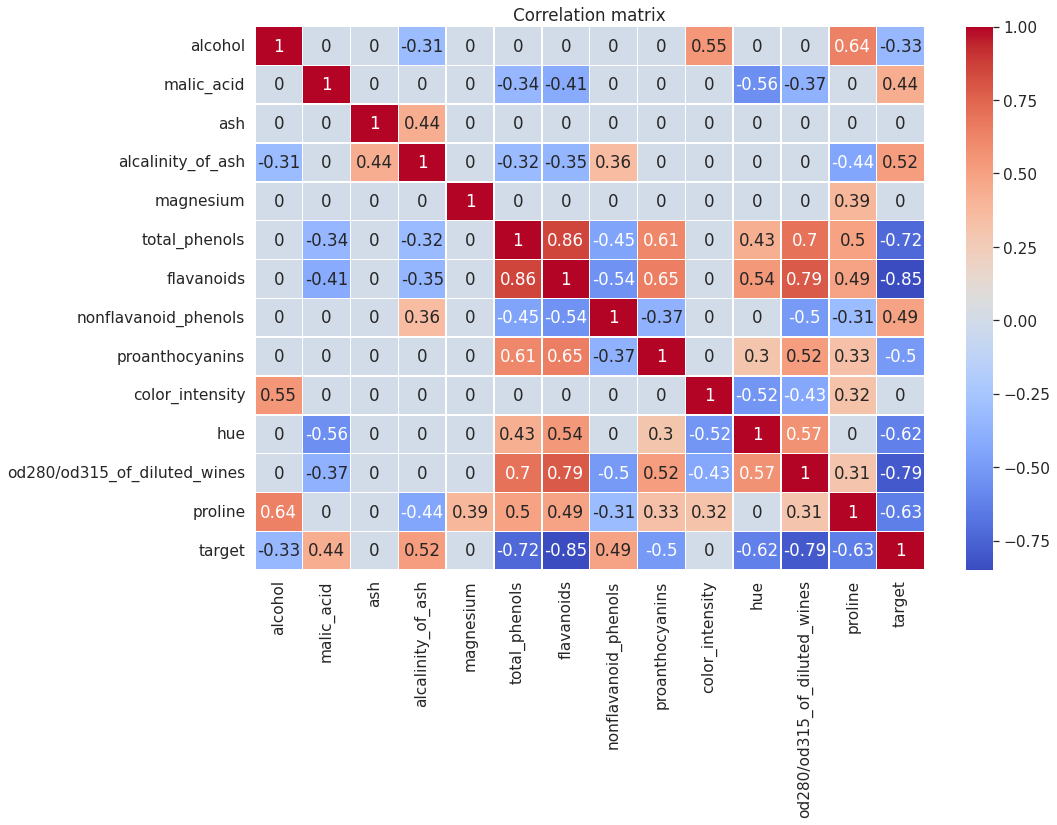

In [18]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

X_corr = X.corr()
X_corr = np.round(X_corr, 2)
X_corr[np.abs(X_corr) < 0.3] = 0

sns.heatmap(X_corr, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

#### 9). 
Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному
значению превышает 0.5 (причем, само поле target не должно входить в этот список).

In [19]:
high_corr = list(X_corr[abs(X_corr["target"]) > 0.5].index[:-1])
high_corr

['alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

#### 10). 
Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых
содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X
соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака.
Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с
признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с
помощью метода describe.

In [20]:
X.drop("target", axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [21]:
X_hc_2 = X[high_corr] ** 2

In [22]:
X_hc_2.columns = (i + '_2' for i in X_hc_2.columns)

In [23]:
X = pd.concat([X, X_hc_2], axis=1)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   alcohol                         178 non-null    float64
 1   malic_acid                      178 non-null    float64
 2   ash                             178 non-null    float64
 3   alcalinity_of_ash               178 non-null    float64
 4   magnesium                       178 non-null    float64
 5   total_phenols                   178 non-null    float64
 6   flavanoids                      178 non-null    float64
 7   nonflavanoid_phenols            178 non-null    float64
 8   proanthocyanins                 178 non-null    float64
 9   color_intensity                 178 non-null    float64
 10  hue                             178 non-null    float64
 11  od280/od315_of_diluted_wines    178 non-null    float64
 12  proline                         178 

In [25]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,391.142865,5.657030,5.110049,0.968661,7.322155,6.564591e+05
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,133.671775,2.936294,4.211441,0.443798,3.584316,5.558591e+05
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,112.360000,0.960400,0.115600,0.230400,1.612900,7.728400e+04
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,295.840000,3.036325,1.452100,0.612325,3.754075,2.505010e+05
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,380.250000,5.546050,4.558250,0.931250,7.728400,4.536045e+05
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,462.250000,7.840000,8.265700,1.254400,10.048900,9.702250e+05
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,900.000000,15.054400,25.806400,2.924100,16.000000,2.822400e+06
